# Room Occupancy Classification using Sensor Data


# Introduction
In recent years, smart building automation has gained significant attention, with an increasing demand for efficient space utilization and energy management. Room occupancy classification plays a crucial role in optimizing resources such as lighting, heating, and air conditioning systems. In this project, I explored multiple machine learning models to classify room occupancy based on sensor data, including temperature, light, sound, CO2 levels, and motion detection. By applying data preprocessing techniques such as handling missing values, feature scaling, and balancing the dataset using SMOTE, I trained and evaluated models like Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Random Forest, Gradient Boosting, and XGBoost. The results demonstrated that machine learning algorithms can accurately predict room occupancy, making them a promising solution for intelligent building management systems.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, auc
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import math


In [2]:
# Load the dataset
df = pd.read_csv('Occupancy_Estimation.csv')

In [3]:
# Column Descriptions
column_descriptions = {
    "S1_Temp": "Temperature recorded by sensor 1",
    "S2_Temp": "Temperature recorded by sensor 2",
    "S3_Temp": "Temperature recorded by sensor 3",
    "S4_Temp": "Temperature recorded by sensor 4",
    "S1_Light": "Light intensity recorded by sensor 1",
    "S2_Light": "Light intensity recorded by sensor 2",
    "S3_Light": "Light intensity recorded by sensor 3",
    "S4_Light": "Light intensity recorded by sensor 4",
    "S1_Sound": "Sound level recorded by sensor 1",
    "S2_Sound": "Sound level recorded by sensor 2",
    "S3_Sound": "Sound level recorded by sensor 3",
    "S4_Sound": "Sound level recorded by sensor 4",
    "S5_CO2": "CO2 concentration recorded by sensor 5",
    "S5_CO2_Slope": "Rate of change of CO2 concentration",
    "S6_PIR": "Motion detection recorded by sensor 6",
    "S7_PIR": "Motion detection recorded by sensor 7",
    "Room_Occupancy_Count": "Target variable - Number of people in the room"
}

In [4]:
# Display column descriptions
for col, desc in column_descriptions.items():
    print(f"{col}: {desc}")

S1_Temp: Temperature recorded by sensor 1
S2_Temp: Temperature recorded by sensor 2
S3_Temp: Temperature recorded by sensor 3
S4_Temp: Temperature recorded by sensor 4
S1_Light: Light intensity recorded by sensor 1
S2_Light: Light intensity recorded by sensor 2
S3_Light: Light intensity recorded by sensor 3
S4_Light: Light intensity recorded by sensor 4
S1_Sound: Sound level recorded by sensor 1
S2_Sound: Sound level recorded by sensor 2
S3_Sound: Sound level recorded by sensor 3
S4_Sound: Sound level recorded by sensor 4
S5_CO2: CO2 concentration recorded by sensor 5
S5_CO2_Slope: Rate of change of CO2 concentration
S6_PIR: Motion detection recorded by sensor 6
S7_PIR: Motion detection recorded by sensor 7
Room_Occupancy_Count: Target variable - Number of people in the room


In [5]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [6]:
#Exploratory Data Analysis

print("\n First 5 Rows of Dataset:")
print(df.head())


 First 5 Rows of Dataset:
         Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.76

In [7]:
print("\n First 5 Rows of Dataset:")
print(df.head())


 First 5 Rows of Dataset:
         Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.76

In [8]:
# Dropping 'Date' and 'Time' columns
df.drop(columns=["Date", "Time"], inplace=True)

In [9]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [10]:
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64


In [11]:
#Convert Room_Occupancy_Count to binary (1=Occupied,0=Empty)

df["Occupancy"]=df["Room_Occupancy_Count"].apply(lambda x:1 if x>0 else 0)

In [23]:
X=df.drop(columns=["Room_Occupancy_Count","Occupancy"])
y=df["Occupancy"]

In [25]:
print(X.columns)

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'],
      dtype='object')


In [27]:
#Shape

print(X.shape)
print(y.shape)

(10129, 16)
(10129,)


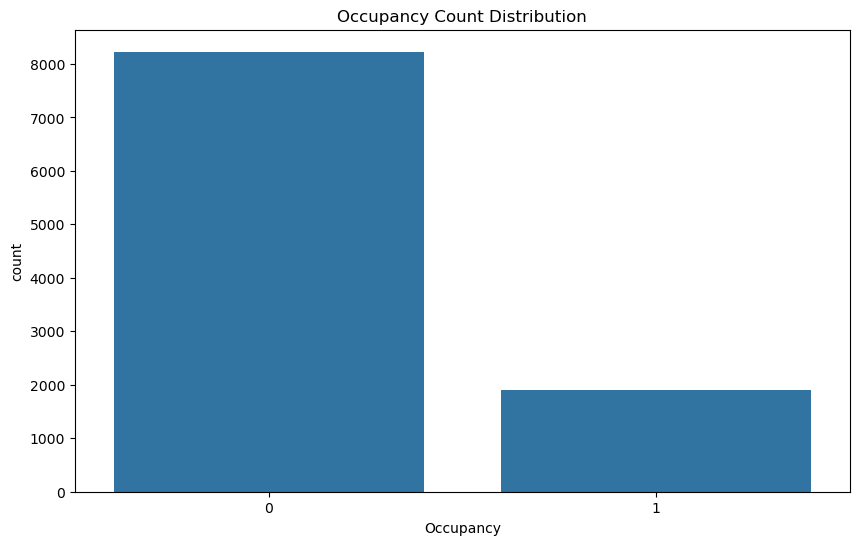

In [29]:
# Exploratory Data Analysis (EDA) with Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Occupancy"])
plt.title("Occupancy Count Distribution")
plt.show()

In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

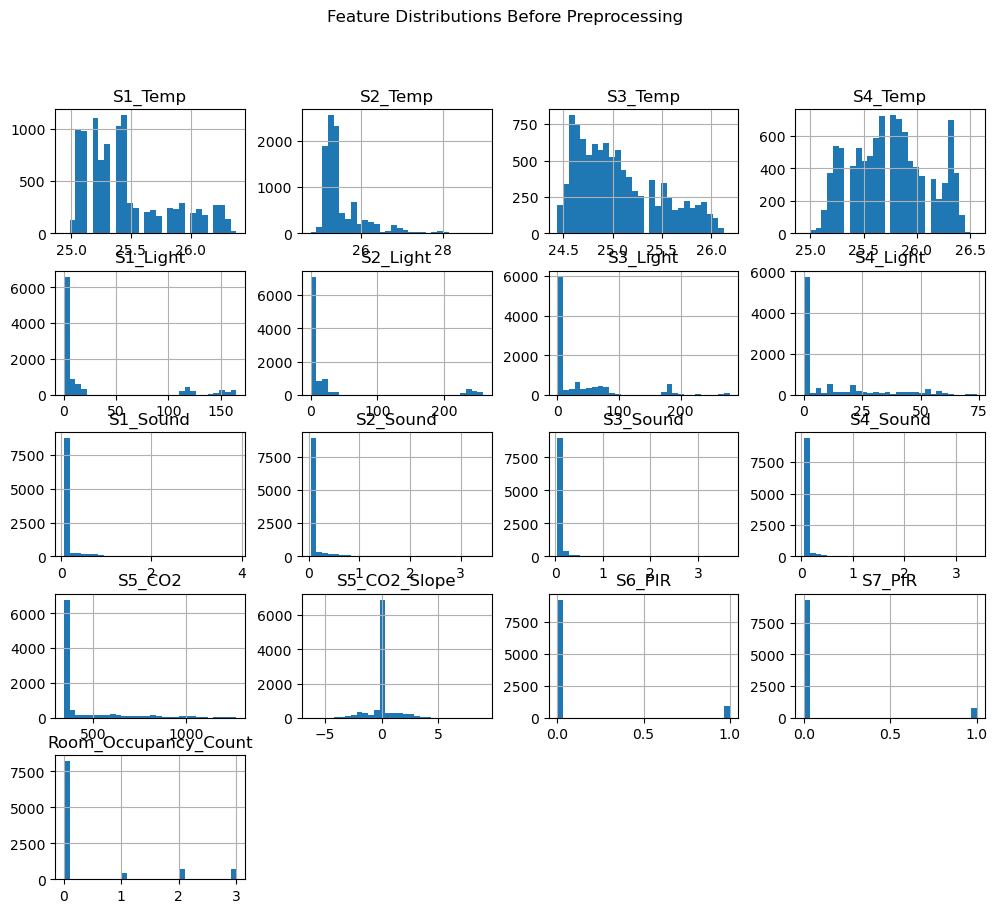

In [33]:
# Histogram of Features
df.drop(columns=["Occupancy"]).hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions Before Preprocessing")
plt.show()

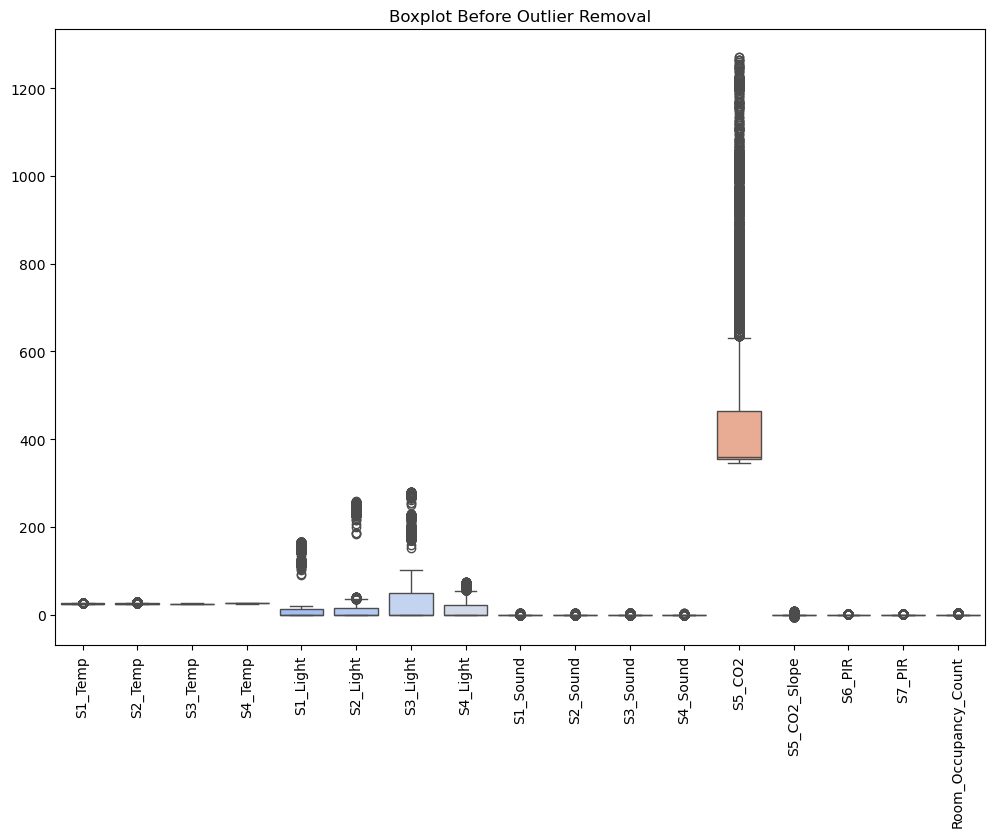

In [34]:
# Boxplot for Outlier Detection
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=["Occupancy"]), palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Boxplot Before Outlier Removal")
plt.show()

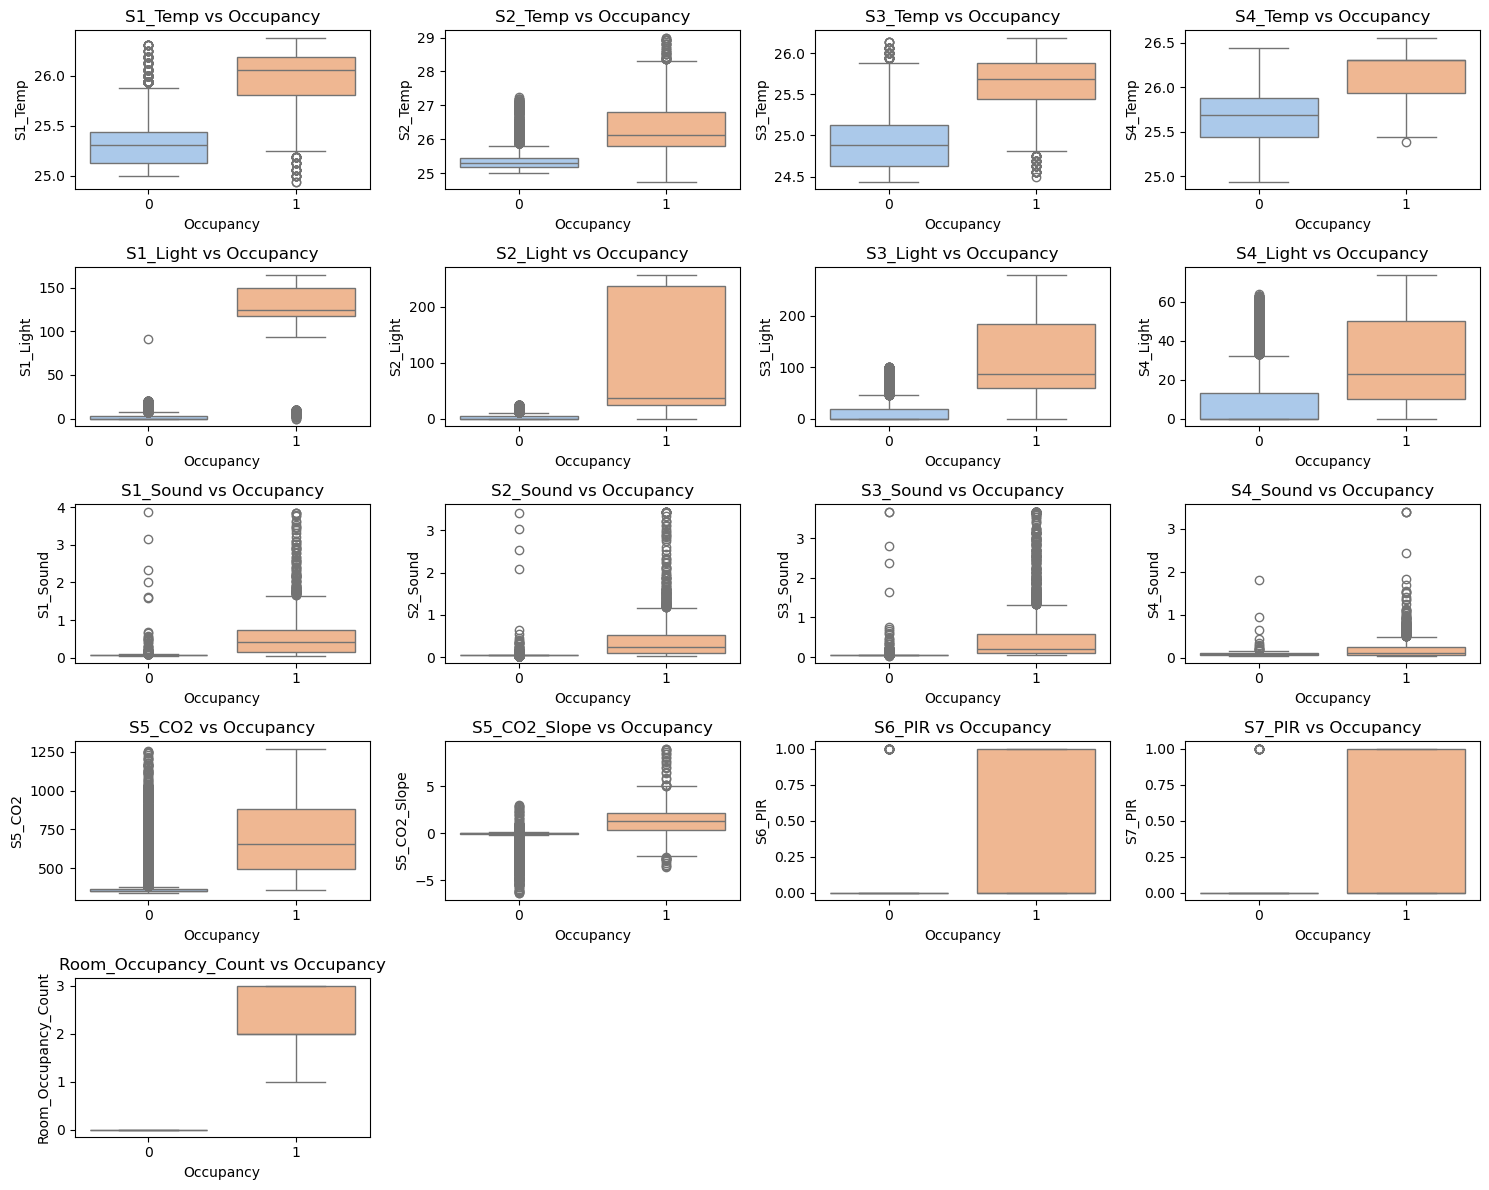

In [36]:
num_features = len(df.drop(columns=["Occupancy"]).columns)
rows = (num_features // 4) + (num_features % 4 > 0)  # Adjust row count dynamically

plt.figure(figsize=(15, 12))
for i, col in enumerate(df.drop(columns=["Occupancy"]).columns, 1):
    plt.subplot(rows, 4, i)  # Adjusted rows dynamically
    sns.boxplot(x=df["Occupancy"], y=df[col], palette="pastel")
    plt.title(f"{col} vs Occupancy")

plt.tight_layout()  # Prevent overlap
plt.show()


In [37]:
# Outlier Removal using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


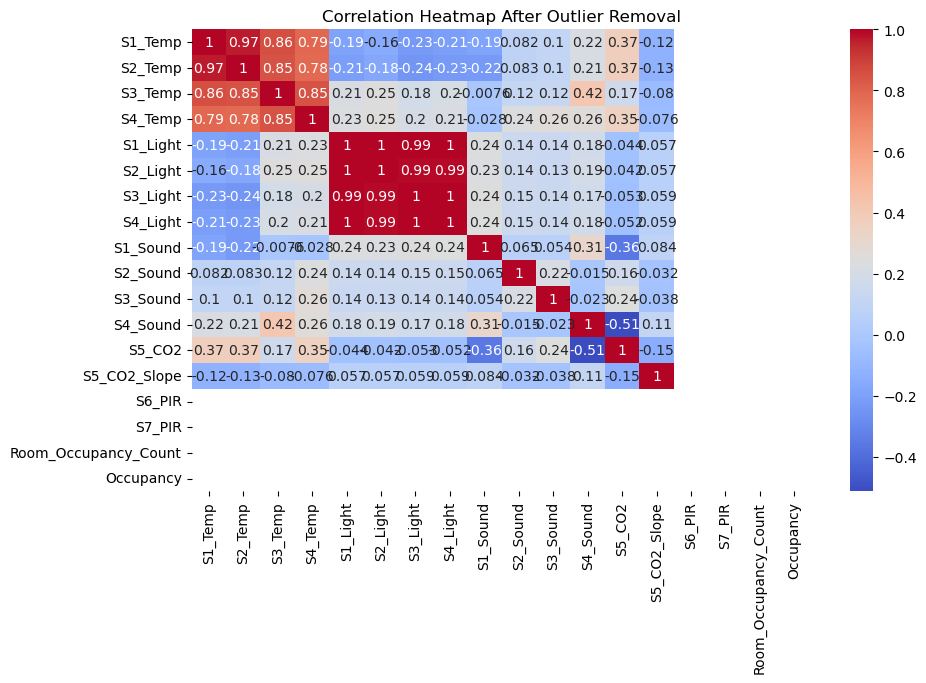

In [39]:
# Correlation Heatmap after outlier removal
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap After Outlier Removal")
plt.show()


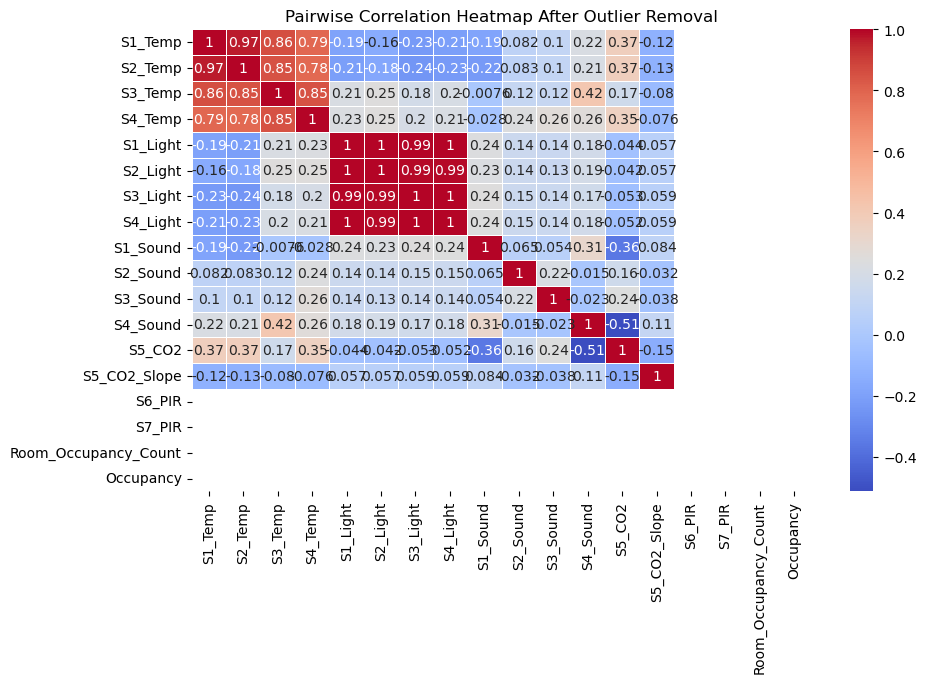

In [40]:
# Pairwise Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Pairwise Correlation Heatmap After Outlier Removal")
plt.show()

Columns with zero variance: ['S6_PIR', 'S7_PIR', 'Room_Occupancy_Count', 'Occupancy']


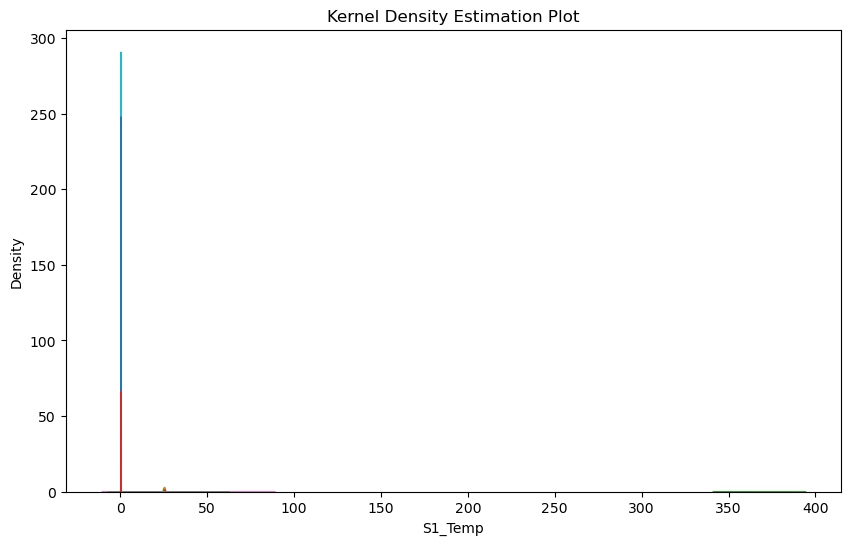

In [41]:
# KDE Plot for Feature Distributions

# Identify zero-variance columns
zero_var_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Columns with zero variance:", zero_var_cols)

# Drop zero-variance columns
df_nonzero_var = df.drop(columns=zero_var_cols)

# Plot KDE for remaining columns
plt.figure(figsize=(10, 6))
for col in df_nonzero_var.columns:
    sns.kdeplot(df_nonzero_var[col], shade=True, label=col, warn_singular=False)
plt.title("Kernel Density Estimation Plot")
plt.show()


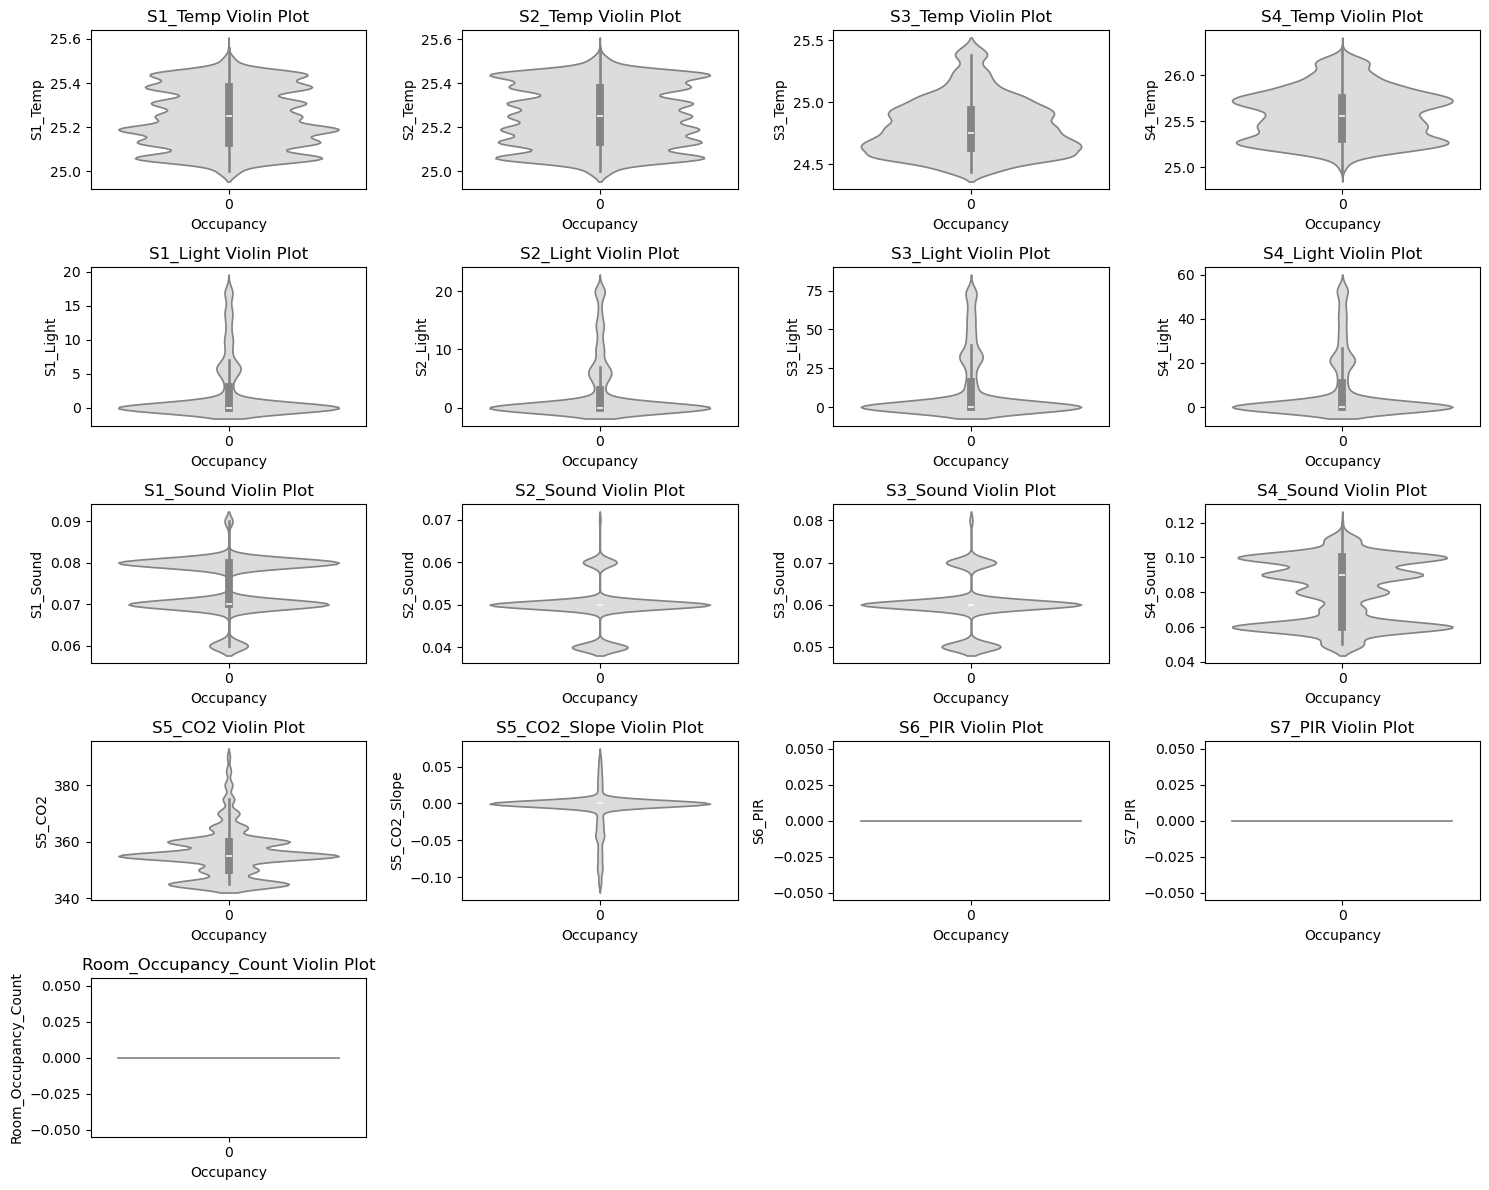

In [42]:
# Drop the target column
feature_cols = df.drop(columns=["Occupancy"]).columns  

# Determine grid size dynamically
num_features = len(feature_cols)
num_rows = math.ceil(num_features / 4)  # Adjust rows based on the number of features
num_cols = min(num_features, 4)  # Keep columns <= 4

plt.figure(figsize=(15, 12))

for i, col in enumerate(feature_cols, 1):
    plt.subplot(num_rows, num_cols, i)  # Dynamically adjust the grid
    sns.violinplot(x=df["Occupancy"], y=df[col], palette="coolwarm")
    plt.title(f"{col} Violin Plot")

plt.tight_layout()  # Avoid overlapping
plt.show()

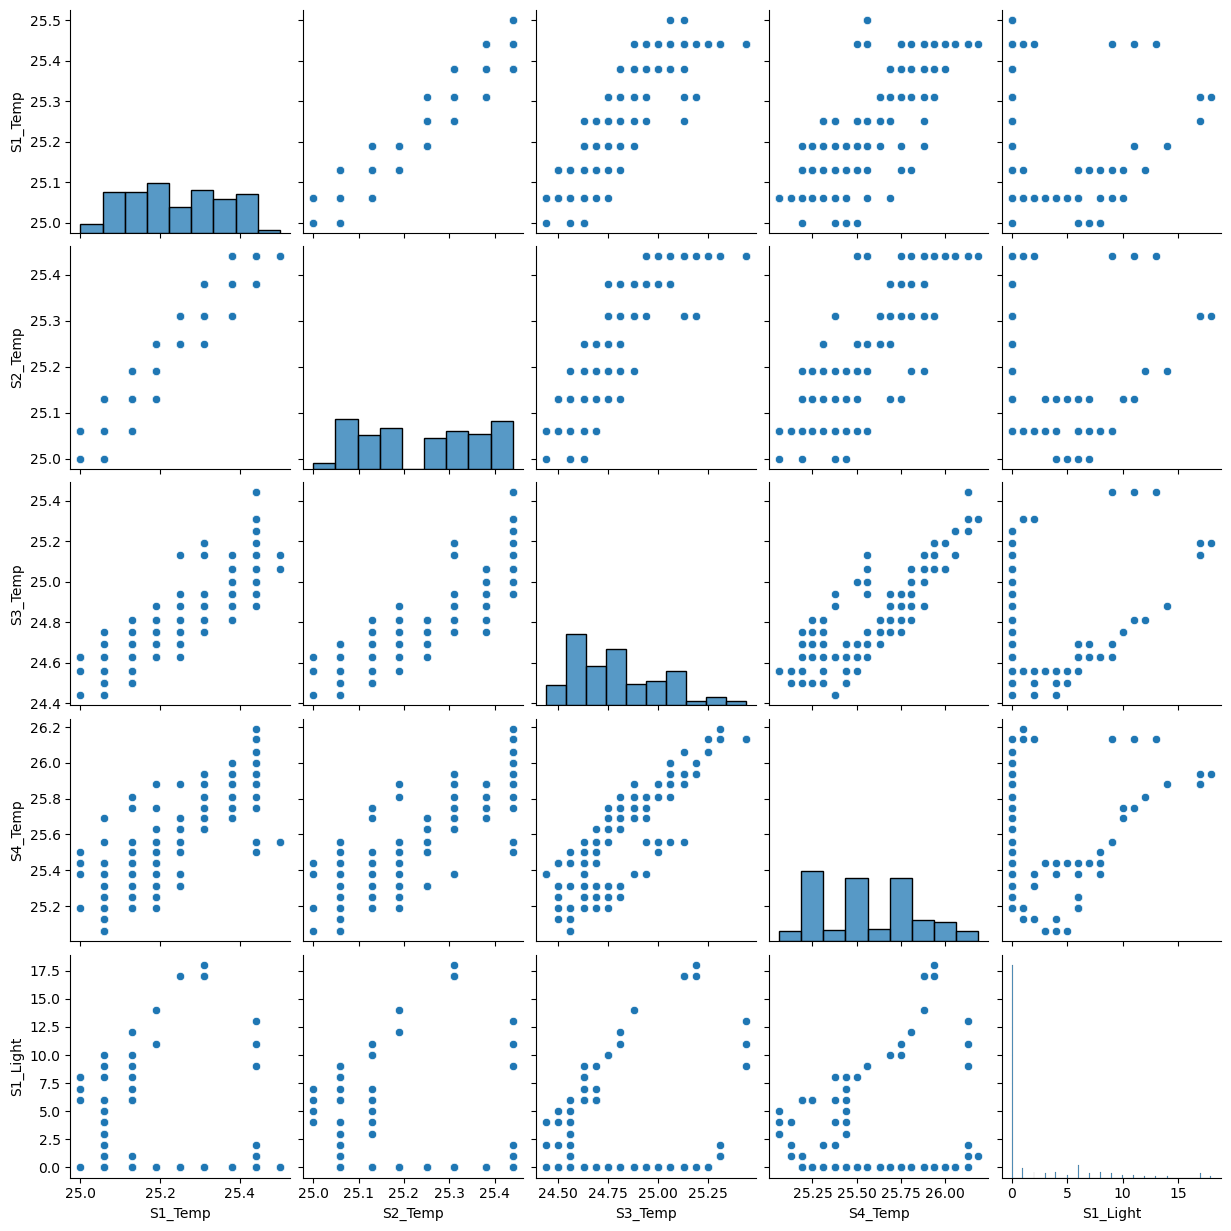

In [43]:
cols = ["S1_Temp","S2_Temp","S3_Temp","S4_Temp", "S1_Light"]
sns.pairplot(df[cols].sample(200))


In [78]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Class distribution before SMOTE:", Counter(y_train))


Class distribution before SMOTE: Counter({0: 6582, 1: 1521})


In [80]:
#Apply SMOTE to balance classes 

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_train_resampled))


Class distribution after SMOTE: Counter({0: 6582, 1: 6582})


In [82]:
# Apply Standard Scaling AFTER SMOTE
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data


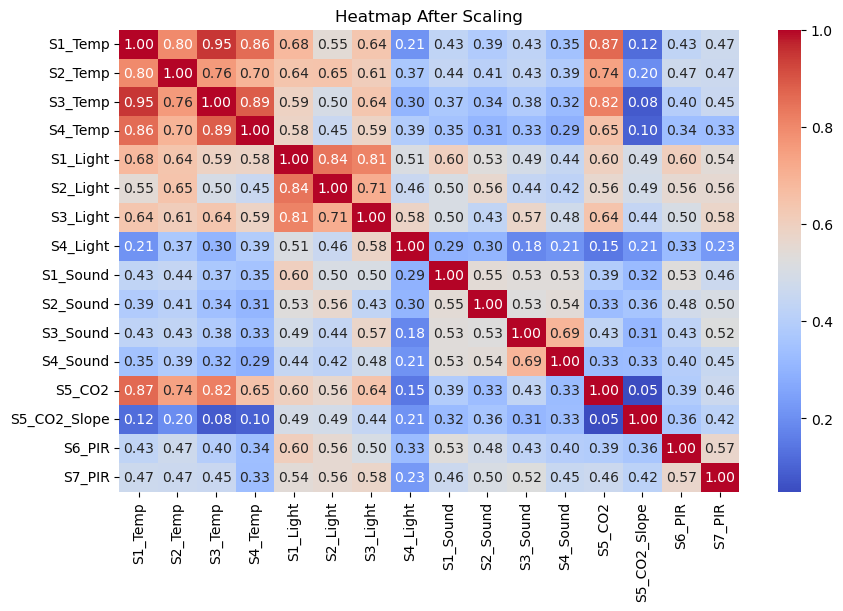

In [50]:
# Correlation heatmap after scaling
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(X_train, columns=X.columns).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap After Scaling")
plt.show()

# Model Training & Evaluation


Logistic Regression Accuracy: 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       1.00      1.00      1.00       380

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



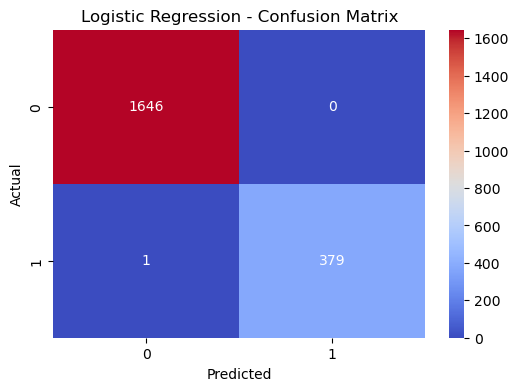

In [84]:
#  Train Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)

#  Make Predictions
y_pred = logistic_model.predict(X_test_scaled)

#  Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

#  Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

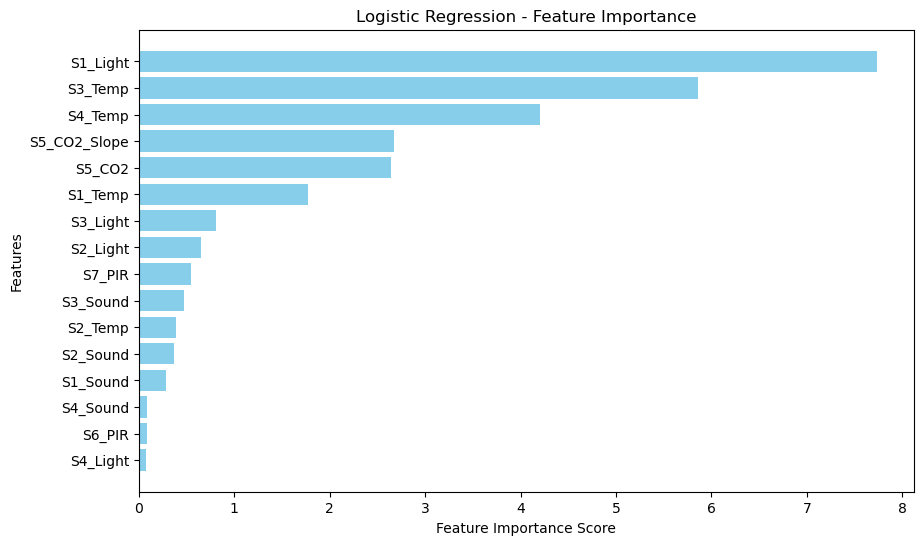

In [124]:
# Get feature importance (absolute values of coefficients)
feature_importance = np.abs(logistic_model.coef_).flatten()  
feature_names = X.columns  # Feature names

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Logistic Regression - Feature Importance")
plt.gca().invert_yaxis()  
plt.show()

KNN Accuracy: 0.9990

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       0.99      1.00      1.00       380

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



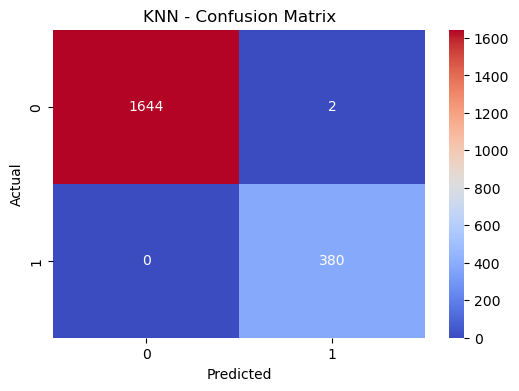

In [90]:
# Train KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train_resampled, y_train_resampled)

#  Make Predictions
y_pred_knn = knn_model.predict(X_test_scaled)

#  Evaluate Model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, zero_division=1))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN - Confusion Matrix")
plt.show()


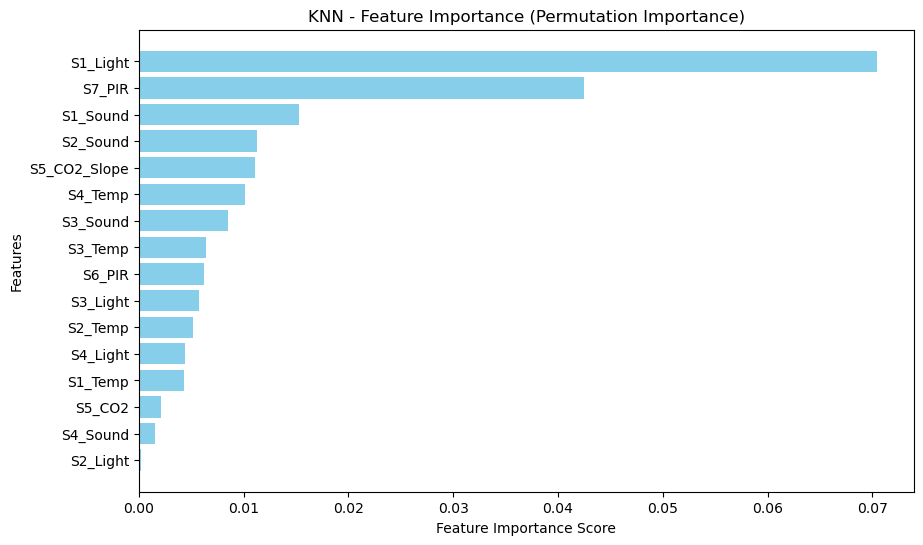

In [122]:
from sklearn.inspection import permutation_importance
# Compute permutation importance
perm_importance = permutation_importance(knn_model, X_test_scaled, y_test, scoring='accuracy', n_repeats=10, random_state=42)

# Create a DataFrame for visualization
feature_importance = perm_importance.importances_mean  # Mean importance score
feature_names = X.columns  # Feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("KNN - Feature Importance (Permutation Importance)")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

SVM Model Accuracy: 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       1.00      1.00      1.00       380

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



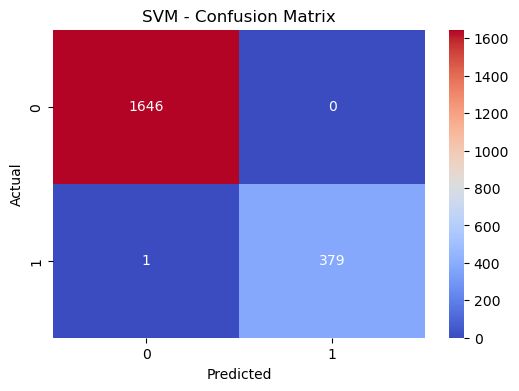

In [94]:
#  Train SVM Model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)  # RBF kernel works well for classification
svm_model.fit(X_train_resampled, y_train_resampled)

#  Make Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

#  Evaluate Model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {svm_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=1))

#  Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM - Confusion Matrix")
plt.show()


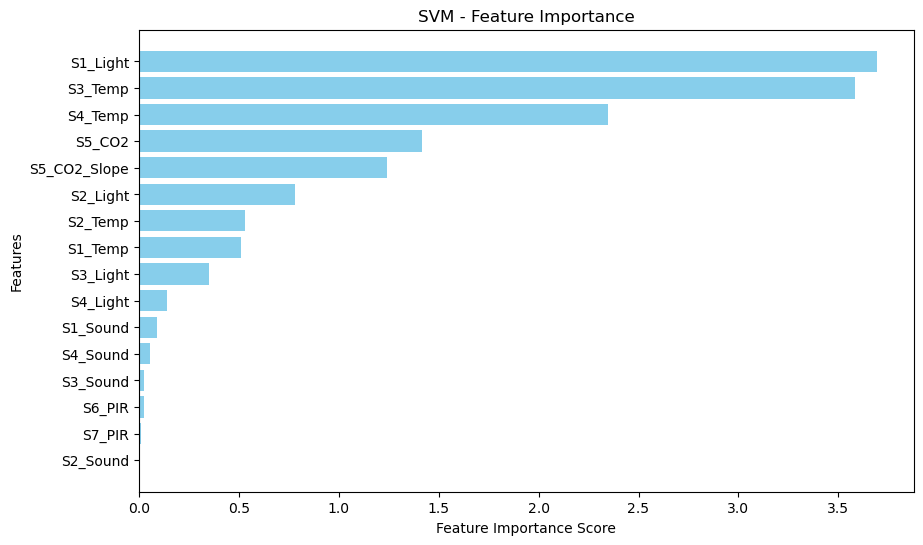

In [118]:
#Check if the SVM model has coefficients (only works for linear kernel)
if hasattr(svm_model, "coef_"):
    feature_importance = np.abs(svm_model.coef_).flatten()  # Get absolute values of coefficients
    feature_names = X.columns  # Feature names

    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot Feature Importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title("SVM - Feature Importance")
    plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
    plt.show()
else:
    print("Feature importance is only available for linear SVM. Your model uses an RBF kernel.")

Random Forest Accuracy: 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       1.00      1.00      1.00       380

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



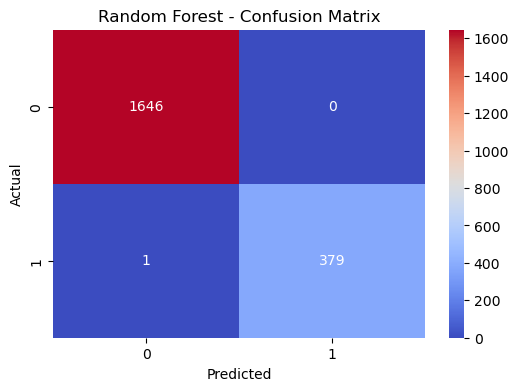

In [96]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

#  Make Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

#  Evaluate Model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()

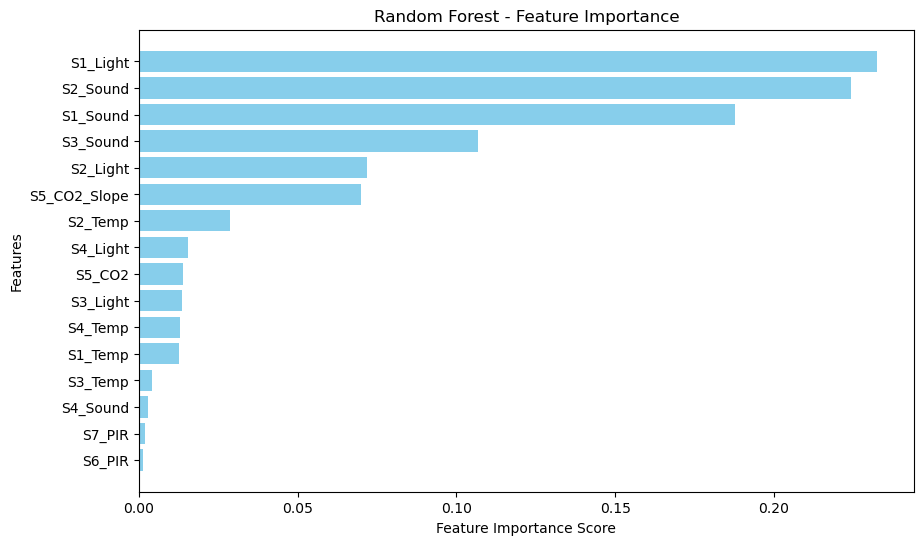

In [108]:
# Plot Feature Importance
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10,6))
plt.barh(np.array(X.columns)[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest - Feature Importance")
plt.show()

Gradient Boosting Model Accuracy: 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       1.00      1.00      1.00       380

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



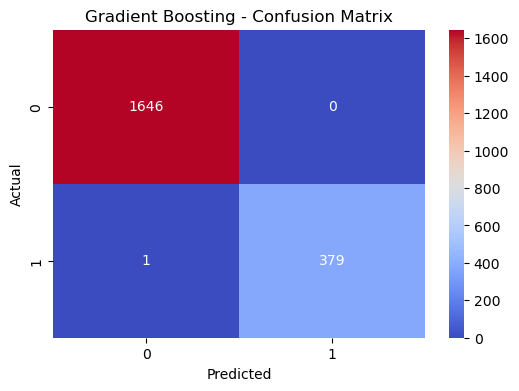

In [98]:
#  Train Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

#  Make Predictions
y_pred_gb = gb_model.predict(X_test_scaled)

#  Evaluate Model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Model Accuracy: {gb_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb, zero_division=1))

#  Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()


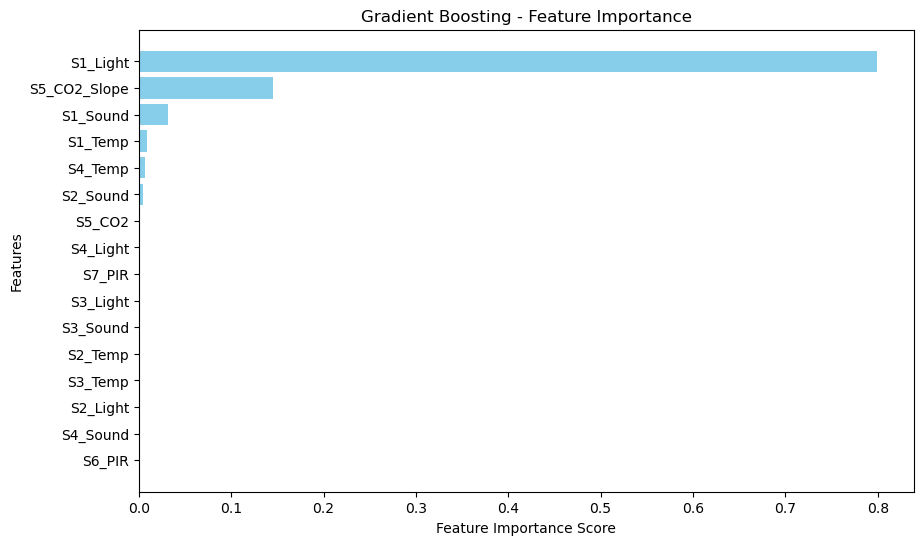

In [106]:
# Plot Feature Importance
feature_importances = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10,6))
plt.barh(np.array(X.columns)[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Gradient Boosting - Feature Importance")
plt.show()

In [430]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


XGBoost Model Accuracy: 0.9985

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       1.00      0.99      1.00       380

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



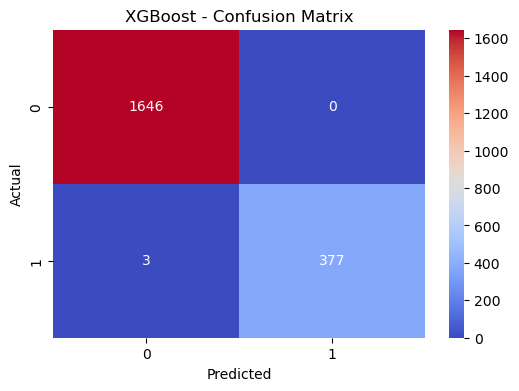

In [102]:
#  Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

#  Make Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

#  Evaluate Model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {xgb_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, zero_division=1))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost - Confusion Matrix")
plt.show()


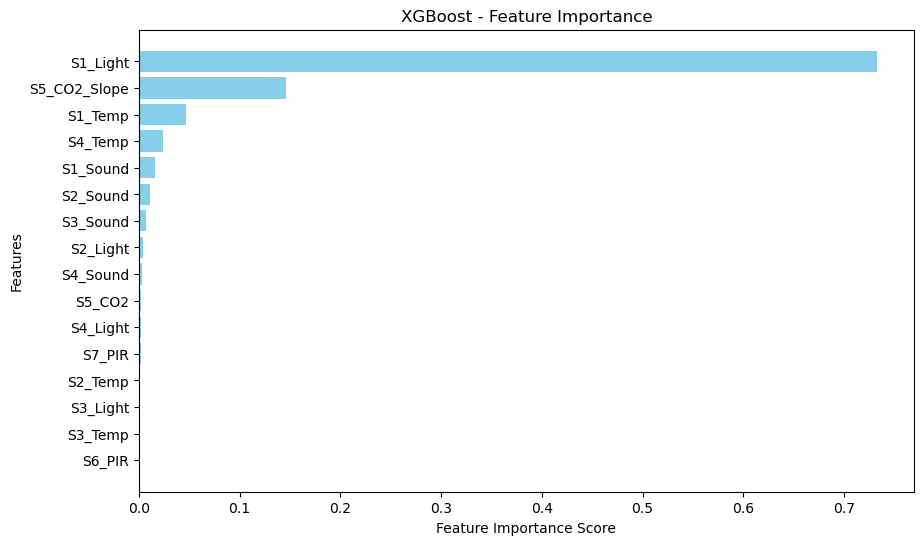

In [104]:
# Plot Feature Importance
feature_importances = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10,6))
plt.barh(np.array(X.columns)[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost - Feature Importance")
plt.show()


 # Conclusion
 In this project, I developed a machine learning-based Room Occupancy Classification system using sensor data. Various models, including Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Random Forest, Gradient Boosting, and XGBoost, were trained and evaluated. The dataset was preprocessed with techniques like handling missing values, feature scaling, and balancing with SMOTE. After model evaluation, Logistic Regression, SVM, Random Forest, and Gradient Boosting achieved the highest accuracy of 99.95%. The results indicate that machine learning algorithms can effectively classify room occupancy, making them a valuable solution for smart building management systems. This project demonstrates how AI can optimize energy efficiency and space utilization in automated environments.